<a href="https://colab.research.google.com/github/sonzwon/TIL_DL/blob/master/%5BML%5DRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

가설 : y = 4 + 3x + ε
- θ0 = 4
- θ1 = 3

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

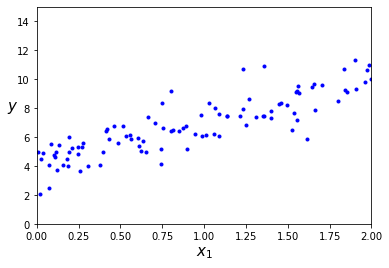

In [6]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$y$', rotation=0, fontsize=15)
plt.axis([0, 2, 0, 15])
plt.show()

### 정규방정식으로 최적의 θ값 찾기

In [8]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best  # θ0 = 4.18687357, θ1 = 2.87581262으로 예측됨

array([[4.18687357],
       [2.87581262]])

In [14]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]

In [21]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.18687357],
       [9.9384988 ]])

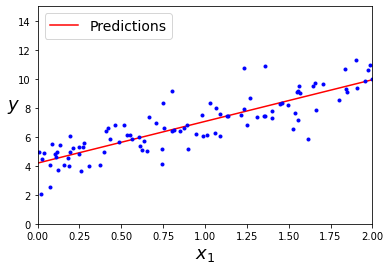

In [24]:
plt.plot(X_new, y_predict, 'r-', label="Predictions")
plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0,2,0,15])
plt.show()

### LinearRegression 클래스 사용해서 최적의 θ구하기

In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.18687357]), array([[2.87581262]]))

In [27]:
lin_reg.predict(X_new)

array([[4.18687357],
       [9.9384988 ]])

spicy.linalg.lstsq()

In [30]:
theta_best_svd, residuals, rank, s =np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.18687357],
       [2.87581262]])

np.linalg.pinv() : 유사역행렬 $\mathbf{X}^+$을 계산
- $\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

In [31]:
np.linalg.pinv(X_b).dot(y)

array([[4.18687357],
       [2.87581262]])

### Gradient Descent

##### 배치 경사하강법

In [33]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

In [36]:
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta * gradients

In [37]:
theta

array([[4.18687357],
       [2.87581262]])

In [38]:
X_new_b.dot(theta)

array([[4.18687357],
       [9.9384988 ]])

In [41]:
# visualization
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = "b-" if iteration > 0 else "r--"
      plt.plot(X_new, y_predict, style)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    if theta_path is not None:
      theta_path.append(theta)
  plt.xlabel("$x_1$", fontsize=18)
  plt.axis([0, 2, 0, 15])
  plt.title(r"$\eta = {}$".format(eta), fontsize=16)

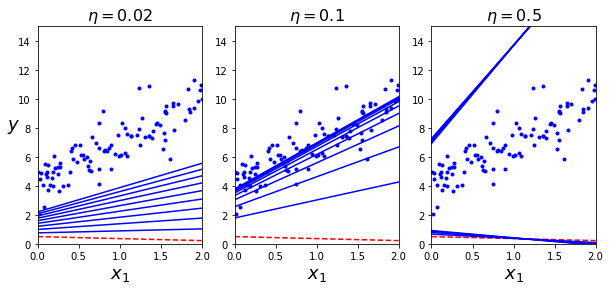

In [42]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

##### 확률적 경사하강법(SGD)

In [43]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

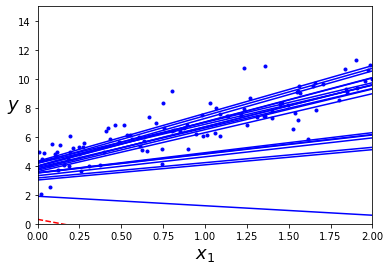

In [45]:
#visualization
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
  for i in range(m):
    if epoch == 0 and i < 20:                    
      y_predict = X_new_b.dot(theta)           
      style = "b-" if i > 0 else "r--"         
      plt.plot(X_new, y_predict, style)        
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                         
plt.show() 

In [46]:
theta

array([[4.14459665],
       [2.8993271 ]])

In [48]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, #epoch 횟수
                       tol=1e-3, #손실함수 감소치의 기준 목표치
                       penalty=None, 
                       eta0=0.1, #학습률
                       random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [49]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.1154232]), array([2.86698101]))

##### 미니배치 경사하강법

In [50]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
  return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for i in range(0, m, minibatch_size):
    t += 1
    xi = X_b_shuffled[i:i+minibatch_size]
    yi = y_shuffled[i:i+minibatch_size]
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(t)
    theta = theta - eta * gradients
    theta_path_mgd.append(theta)

In [51]:
theta

array([[4.26202313],
       [2.97548311]])

In [52]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

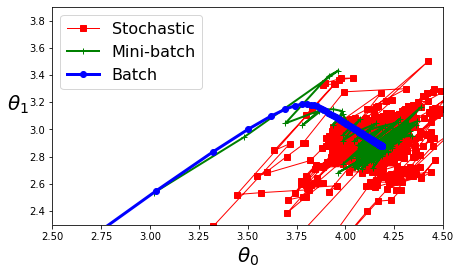

In [53]:
# 경사하강법들의 최적화 경로 비교
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()